In [1]:
 import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import plotly.express as px
from xgboost import XGBClassifier

In [2]:
print("New project")

New project


In [3]:
import pandas as pd
import matplotlib.pyplot as plt #data visualization
import numpy as np #linear algebra
import seaborn as sns #data visualization

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/lastriita/DataVisualization2022/main/Bank%20Customer%20Churn%20Prediction.csv")

In [5]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [9]:
df[df.duplicated(keep=False)]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


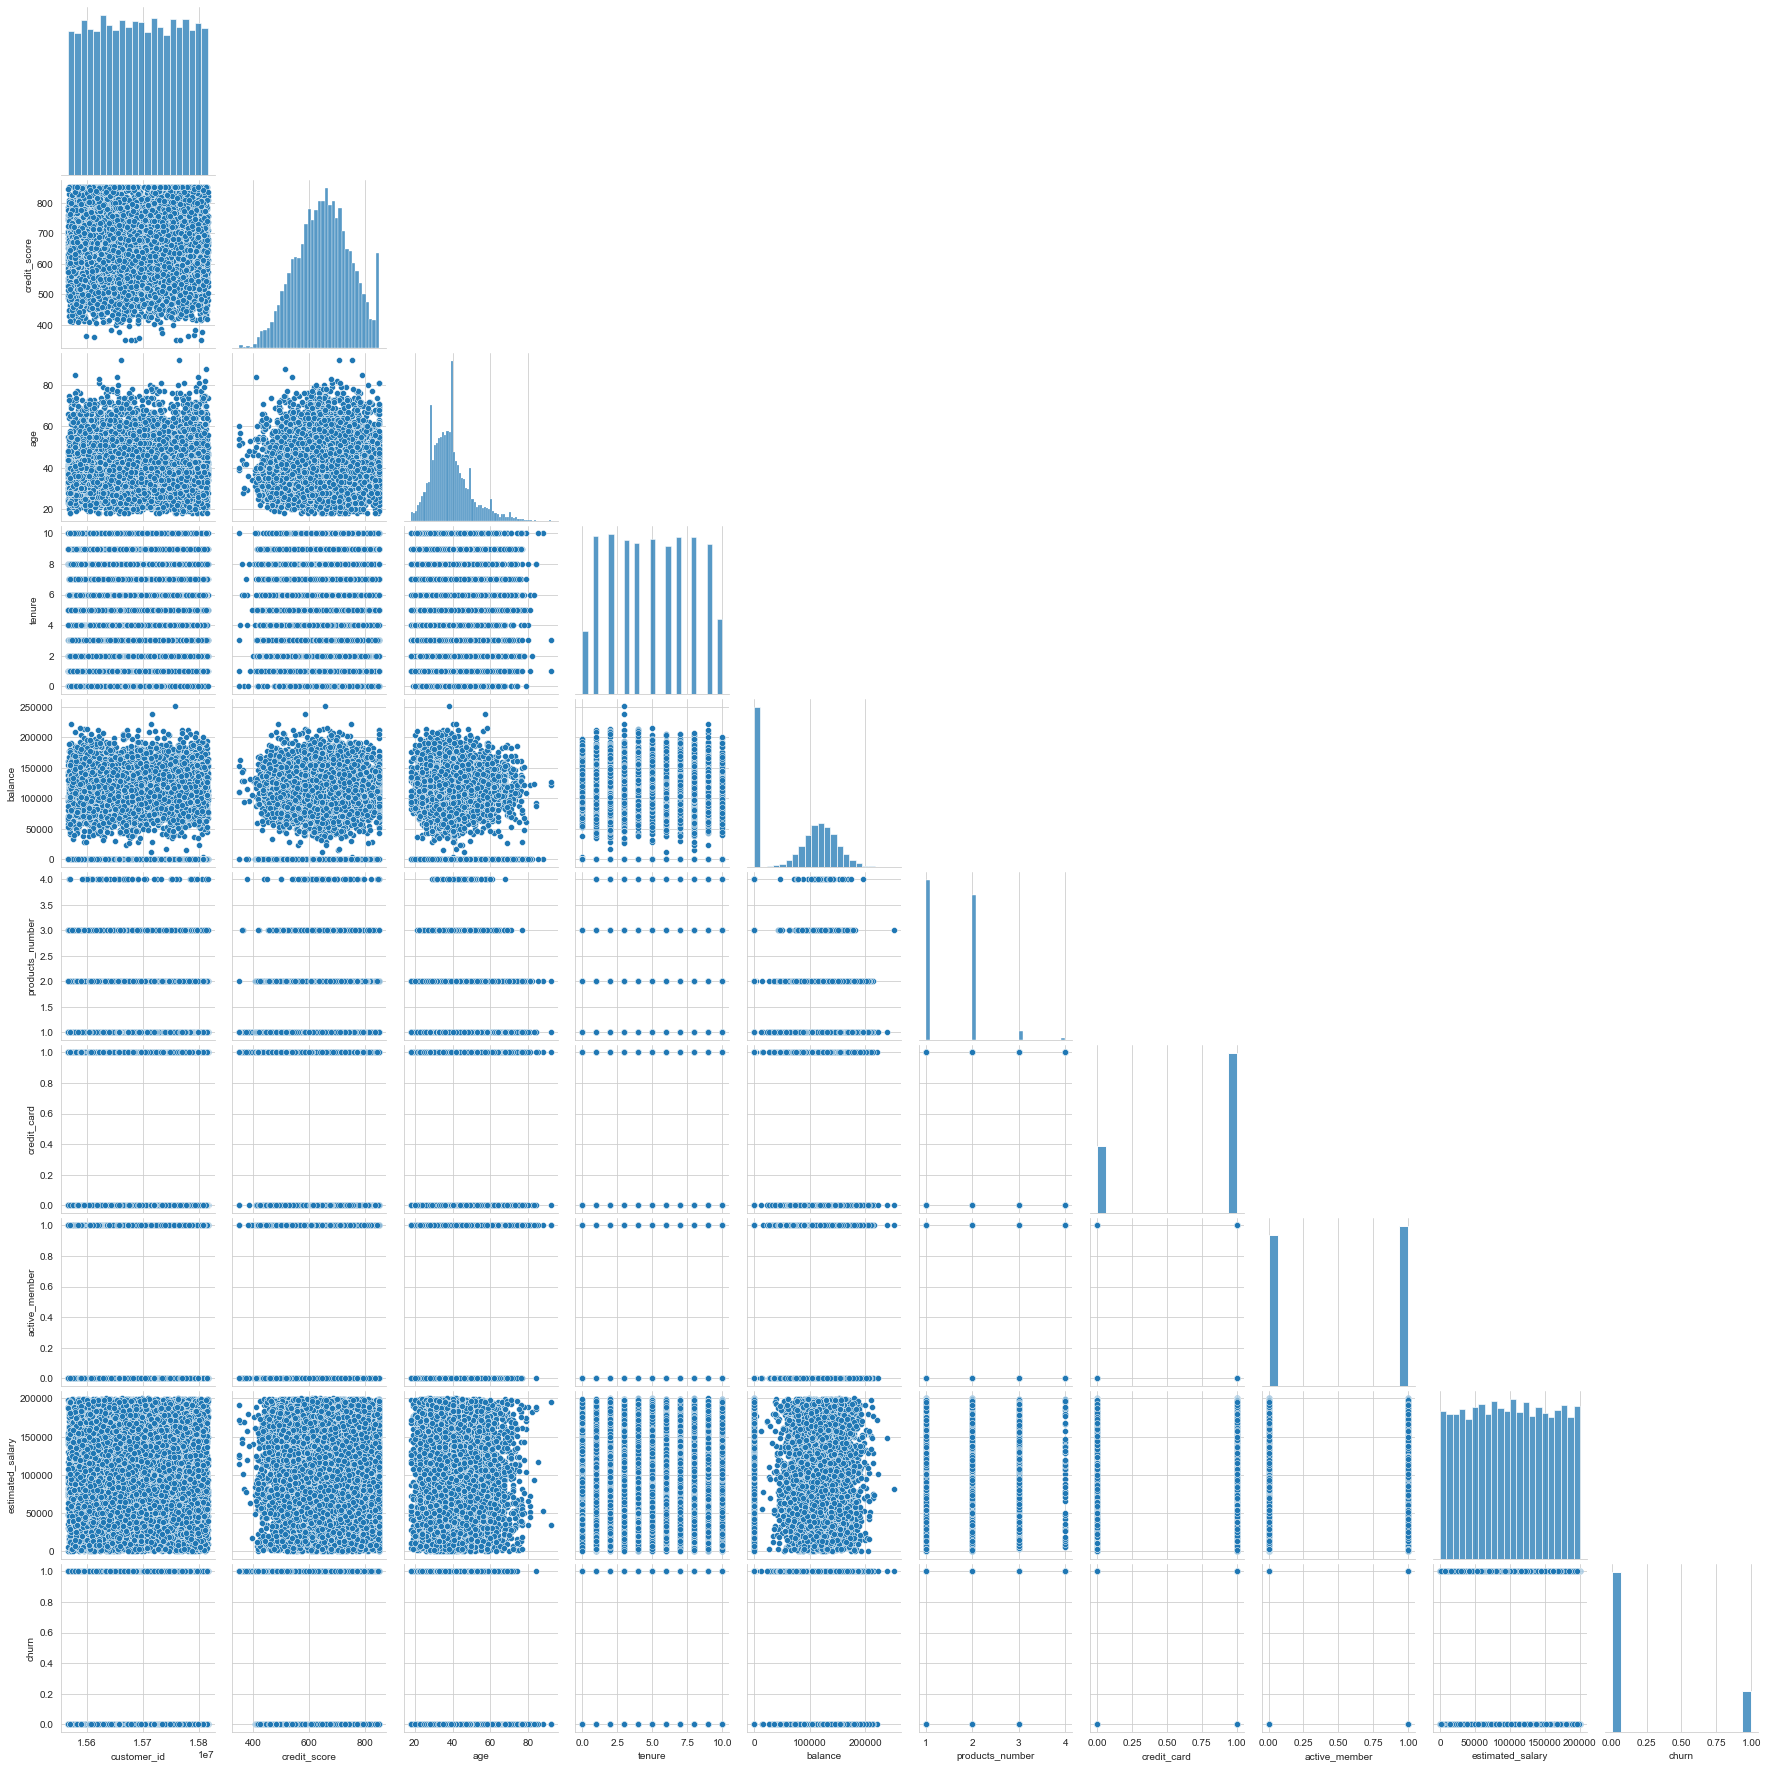

In [10]:
pairplot = sns.pairplot(df, corner=True)
plt.show(pairplot)

Models

In [24]:
from sklearn.model_selection import train_test_split

df = df.drop(['customer_id'], axis=1)
df = pd.get_dummies(df)

X = df.loc[:, df.columns != 'churn']
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
model_logistic = LogisticRegression(penalty = 'none')
model_logistic.fit(X_train, y_train)

LogisticRegression(penalty='none')

In [26]:
accuracy_score(y_test, model_logistic.predict(X_test))

0.7905

In [27]:
featureslog = pd.DataFrame()
featureslog["feature_importance"] = model_logistic.coef_[0]
featureslog["columna"] = X.columns.tolist()
implog = featureslog.sort_values(['feature_importance'], ascending=[False])
implog

,feature_importance,columna
1,0.043957,age
9,0.000962,country_Germany
11,0.000906,gender_Female
3,0.000004,balance
7,-0.000001,estimated_salary
5,-0.000162,credit_card
10,-0.000349,country_Spain
4,-0.000406,products_number
8,-0.000795,country_France
12,-0.001087,gender_Male


In [28]:
px.bar(implog, x='columna', y='feature_importance', color='columna')

In [29]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
accuracy_score(y_test, model_rf.predict(X_test))

0.865

In [30]:
featuresfor = pd.DataFrame()
featuresfor["feature_importance"] = model_rf.feature_importances_
featuresfor["columna"] = X.columns.tolist()
impfor = featuresfor.sort_values(['feature_importance'], ascending=[False])
impfor

,feature_importance,columna
1,0.241082,age
7,0.146254,estimated_salary
3,0.142260,balance
0,0.141634,credit_score
4,0.124377,products_number
2,0.083485,tenure
6,0.040203,active_member
9,0.021709,country_Germany
5,0.019756,credit_card
8,0.010152,country_France


In [31]:
px.bar(impfor, x='columna', y='feature_importance', color='columna')

In [33]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

C:\Users\lastr.DESKTOP-9IJ5894\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:46:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
accuracy_score(y_test, model_xgb.predict(X_test))

0.862

In [35]:
featuresboost = pd.DataFrame()
featuresboost["feature_importance"] = model_xgb.feature_importances_
featuresboost["columna"] = X.columns.tolist()
impboost = featuresboost.sort_values(['feature_importance'], ascending=[False])
impboost

,feature_importance,columna
4,0.265973,products_number
6,0.164249,active_member
1,0.122326,age
9,0.099138,country_Germany
11,0.063348,gender_Female
3,0.055948,balance
8,0.041667,country_France
10,0.041127,country_Spain
7,0.038119,estimated_salary
0,0.037493,credit_score


In [37]:
px.bar(impboost, x='columna', y='feature_importance', color='columna')